**CHANDRACHUD MALALI GOWDA**

Spring 2023

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [10]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a) Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [11]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b) Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c) Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean squared error.

The plot created by running the below cell should "look right" to you.

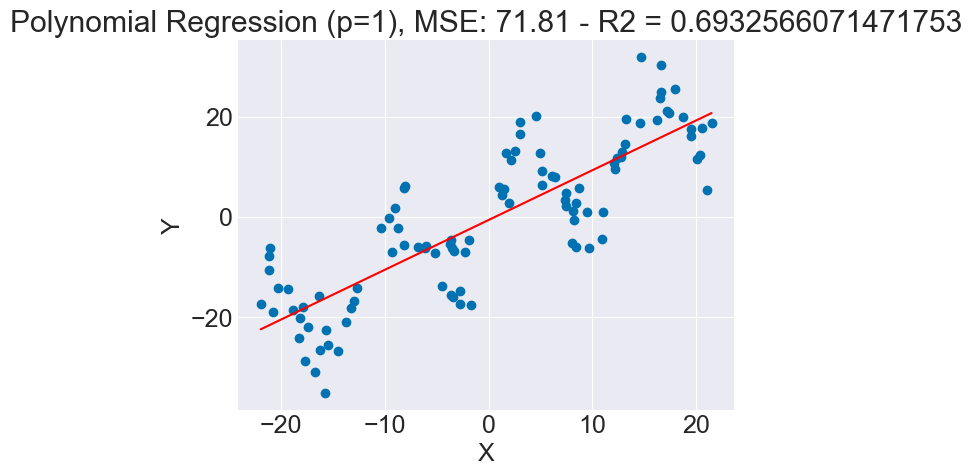

MSE: 71.81095284569933
R^2: 0.6932566071471753


In [12]:
# Fit the poly_data.csv data using a polynomial regression where p = 1
poly_reg = linear_regression.LinearRegression(data.Data('data/poly_data.csv'))
poly_reg.linear_regression(ind_vars=['X'], dep_var='Y', p=1)

# Use scatter of the regression data
poly_reg.scatter('X', 'Y', f'Polynomial Regression (p=1), MSE: {poly_reg.mse:.2f}')

# print out the mse 
print(f'MSE: {poly_reg.mse}')
# Print the r^2 value
print(f'R^2: {poly_reg.R2}')

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

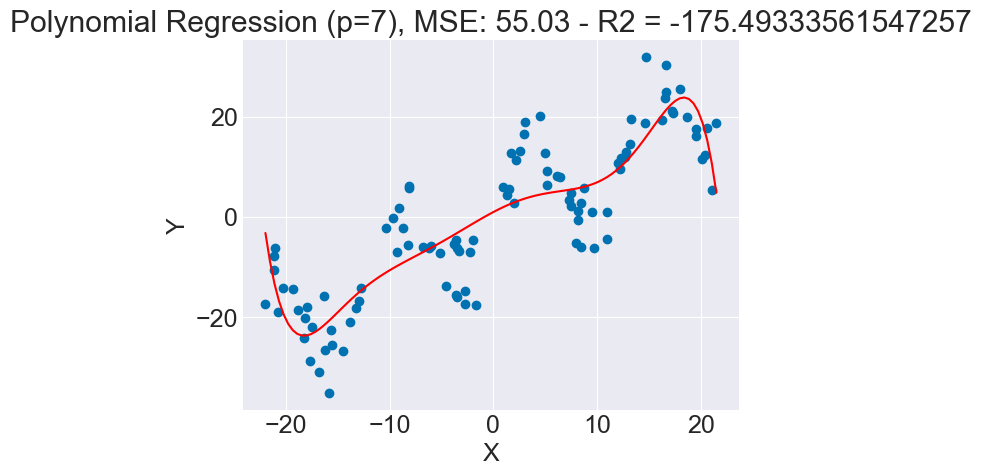

MSE: 55.03088073278097
R^2: -175.49333561547257


In [13]:
# Fit the poly_data.csv data using a polynomial regression where p = 1
poly_reg_2 = linear_regression.LinearRegression(data.Data('data/poly_data.csv'))
poly_reg_2.linear_regression(ind_vars=['X'], dep_var='Y', p=7)

# Use scatter of the regression data
poly_reg_2.scatter('X', 'Y', f'Polynomial Regression (p=7), MSE: {poly_reg_2.mse:.2f}')

# print out the mse 
print(f'MSE: {poly_reg_2.mse}')
# Print the r^2 value
print(f'R^2: {poly_reg_2.R2}')

**Question 4:** Describe the fit compared to `p=1` — is it better or worse? Why?

**Question 5:** Describe what happens visually and in terms of the $R^2$ and MSE values as you experiment with the polynomial degree between 1 and 7.

**Answer 4:** The fit for p=7 appears to be worse than p=1. The graph shows that the curve for p=7 is overfitting the data, as it is able to capture more details in the training data but performs poorly on new data. The high degree polynomial model fits the noise in the data rather than the underlying trend, leading to poor generalization to new data.

**Answer 5:** As the polynomial degree increases from 1 to 7, the training MSE initially decreases, indicating that the model is fitting the training data more accurately. However, beyond p=4, the training MSE starts to increase, indicating that the model is overfitting the data.

Visually, the curve becomes more flexible and tends to fit the training data more closely as the polynomial degree increases. However, beyond p=4, the curve starts to fit the noise in the data and fails to generalize well to new data.

The $R^2$ value for p=1 indicates that approximately 69.3% of the variance in the target variable can be explained by the model. However, for p>1, the $R^2$ value is negative, which is an indication of a poorly fitting model. A negative $R^2$ value indicates that the model is worse than a model that simply predicts the mean of the target variable. This further confirms that the models for p>1 are overfitting the data.

Therefore, the optimal polynomial degree appears to be p=4, as it has the lowest test MSE of 58.8 and does not suffer from the overfitting issues observed in the models with higher polynomial degrees

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a) Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [14]:
filename = 'data/poly_data.csv'
poly_data_fit = data.Data(filename)
poly_data_validate = data.Data(filename)
poly_data_fit.limit_samples(0, 50)
poly_data_validate.limit_samples(50, 100)

print(poly_data_fit)
print(poly_data_validate)

data/poly_data.csv (50x2)
Headers:
  X	  Y	
-----------------------
Showing first 5/50 rows.
2.147	11.382	
9.465	1.034	
4.52	20.251	
1.974	2.89	
-3.358	-6.809	

data/poly_data.csv (50x2)
Headers:
  X	  Y	
-----------------------
Showing first 5/50 rows.
-3.65	-4.658	
9.69	-6.107	
-21.986	-17.271	
-8.694	-2.22	
-15.536	-25.608	



Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b) Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

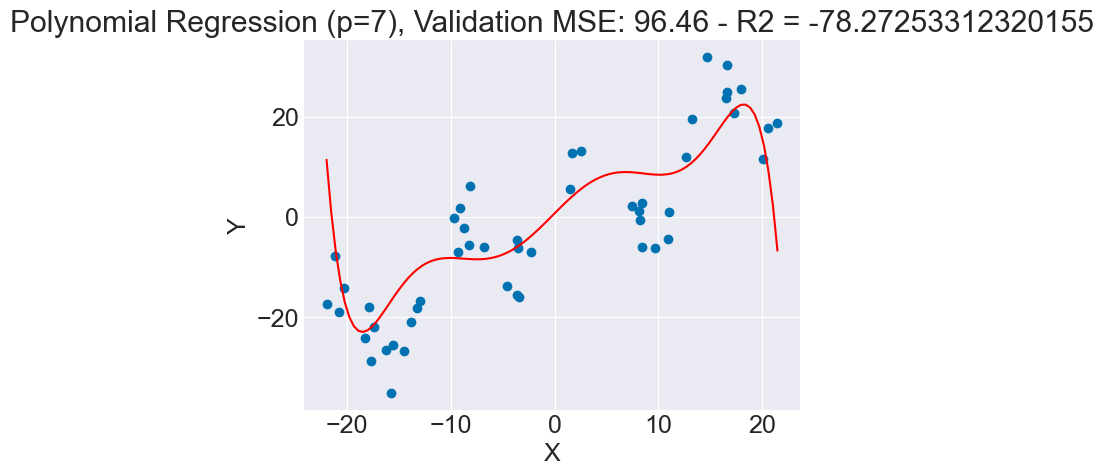

Fit MSE: 38.30258184051851
Validation MSE: 96.45877543079384


In [15]:
# Run the linear regression on the fit data
p = 7

# Already created data objects for both the fit and validation data

# Run the linear regression on the fit data
poly_fit_reg = linear_regression.LinearRegression(poly_data_fit)
poly_fit_reg.linear_regression(ind_vars=['X'], dep_var='Y', p=p)

# Create a new regression object for the validation data
poly_validate_reg = linear_regression.LinearRegression(poly_data_validate)

# Copy over the fitted slope and intercept coefficients associated with the fit data
poly_validate_reg.initialize(['X'], 'Y', poly_fit_reg.get_fitted_slope(), poly_fit_reg.get_fitted_intercept(), p=p)

# Create a scattterplot
poly_validate_reg.scatter('X', 'Y', f'Polynomial Regression (p={p}), Validation MSE: {poly_validate_reg.mse:.2f}')

# Compute and print the MSe for both the fit and validation data
print(f'Fit MSE: {poly_fit_reg.mse}')
print(f'Validation MSE: {poly_validate_reg.mse}')

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

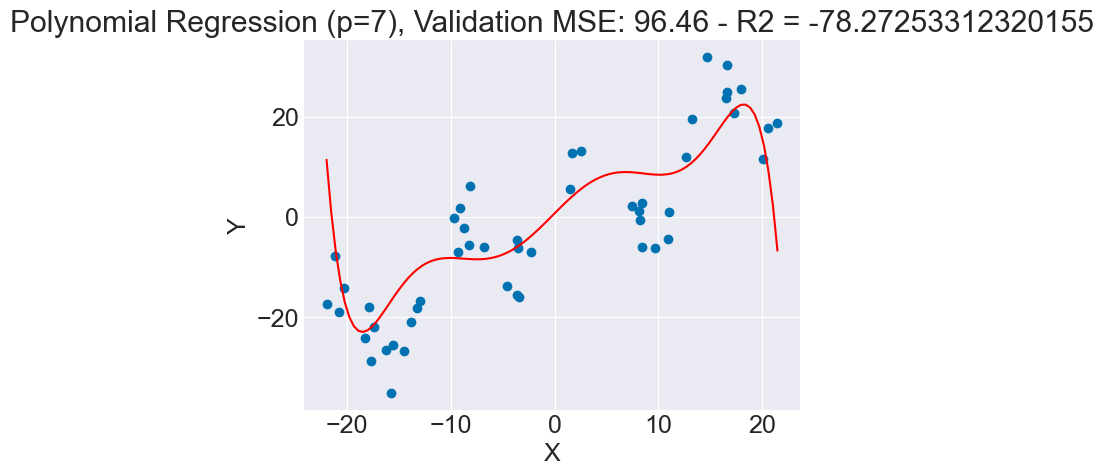

Validation MSE: 96.45877543079384
Validation R^2: -78.27253312320155


In [16]:
# Running polynomial regression on the fit data
poly_fit_reg = linear_regression.LinearRegression(poly_data_fit)
poly_fit_reg.linear_regression(ind_vars=['X'], dep_var='Y', p=p)

# Create a new regression object for the validation data
poly_validate_reg = linear_regression.LinearRegression(poly_data_validate)

# Copy over the fitted slope and intercept coefficients associated with the fit data
poly_validate_reg.initialize(['X'], 'Y', poly_fit_reg.get_fitted_slope(), poly_fit_reg.get_fitted_intercept(), p=p)

# Create a scattterplot showing the fit set and a regression curve fitted to the fit set
poly_validate_reg.scatter('X', 'Y', f'Polynomial Regression (p={p}), Validation MSE: {poly_validate_reg.mse:.2f}')

# Compute and print the MSe for both the fit and validation data
print(f'Validation MSE: {poly_validate_reg.mse}')
# Compute and print the R^2 value for the validation data
print(f'Validation R^2: {poly_validate_reg.R2}')

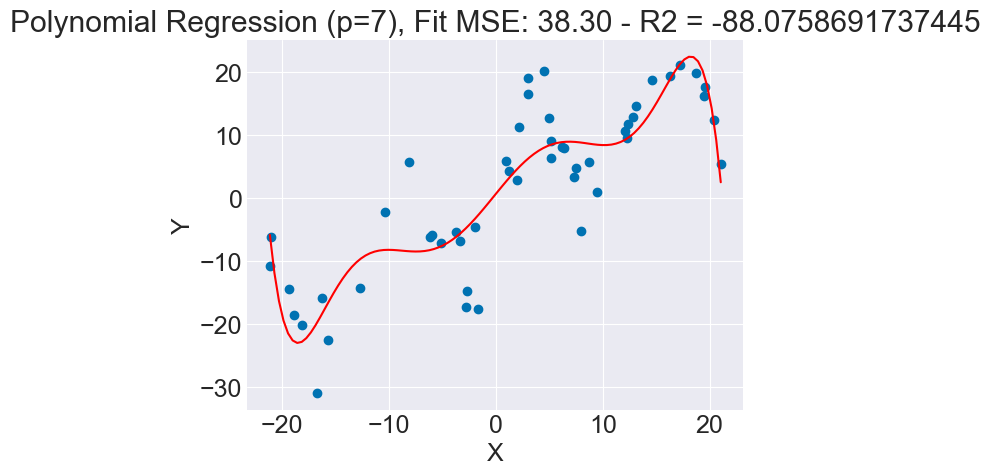

Fit MSE: 38.30258184051851
Fit R^2: -88.0758691737445


In [17]:
# Create a scatterplot showing the fitted set and a regression curve fitted to the fit set
poly_fit_reg.initialize(['X'], 'Y', poly_fit_reg.get_fitted_slope(), poly_fit_reg.get_fitted_intercept(), p=p)
poly_fit_reg.scatter('X', 'Y', f'Polynomial Regression (p={p}), Fit MSE: {poly_fit_reg.mse:.2f}')
# COmpute and print the MSE for the fit data
print(f'Fit MSE: {poly_fit_reg.mse}')
# Compute and print the R^2 value for the fit data
print(f'Fit R^2: {poly_fit_reg.R2}')

In [18]:
# Calculating the MSE for polynomial degrees in the range 1, 13
for p in range(1, 14):
    poly_fit_reg = linear_regression.LinearRegression(poly_data_fit)
    poly_fit_reg.linear_regression(ind_vars=['X'], dep_var='Y', p=p)
    poly_validate_reg = linear_regression.LinearRegression(poly_data_validate)
    poly_validate_reg.initialize(['X'], 'Y', poly_fit_reg.get_fitted_slope(), poly_fit_reg.get_fitted_intercept(), p=p)

    # Print the p value
    print(f'p = {p}')
    # Print the MSE for the fit data
    print(f'Fit MSE: {poly_fit_reg.mse}')
    # Print the MSE for the validation data
    print(f'Validation MSE: {poly_validate_reg.mse}')
    # Print the delta MSSE
    print(f'Delta MSE: {poly_fit_reg.mse - poly_validate_reg.mse}')
    print()

p = 1
Fit MSE: 59.599210975703954
Validation MSE: 88.58467771864787
Delta MSE: -28.985466742943913

p = 2
Fit MSE: 59.408408015828876
Validation MSE: 89.27378847228445
Delta MSE: -29.865380456455576

p = 3
Fit MSE: 53.4882874512343
Validation MSE: 93.01736764114561
Delta MSE: -39.52908018991131

p = 4
Fit MSE: 52.62252388256084
Validation MSE: 91.37791686898431
Delta MSE: -38.75539298642347

p = 5
Fit MSE: 49.807782194744085
Validation MSE: 79.818177701537
Delta MSE: -30.01039550679291

p = 6
Fit MSE: 49.69955230297778
Validation MSE: 79.18969400797873
Delta MSE: -29.49014170500095

p = 7
Fit MSE: 38.30258184051851
Validation MSE: 96.45877543079384
Delta MSE: -58.15619359027532

p = 8
Fit MSE: 38.2602099365476
Validation MSE: 95.50846793586274
Delta MSE: -57.24825799931514

p = 9
Fit MSE: 23.123127239396407
Validation MSE: 37.87784400228863
Delta MSE: -14.754716762892226

p = 10
Fit MSE: 22.631527684994293
Validation MSE: 46.22457167038569
Delta MSE: -23.5930439853914

p = 11
Fit MSE: 

**Question 6:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 7:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSE, $R^2$).

**Question 8:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 9:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSE, $R^2$).

**Answer 6:** The fitted coefficients obtained for the fit set are copied over to the validation set in the code provided. The validation set is then plotted with a regression curve and the MSE and R^2 values are computed and printed for both the fit and validation data.

The validation MSE is 96.46, which is significantly larger than the fit MSE of 38.30. This suggests that the model is not generalizing well to the validation set. Additionally, the validation R^2 value of -78.27 is also much lower than the fit R^2 value of -88.08, indicating that the model is not explaining the variation in the validation set as well as it did in the fit set.

This suggests that the model may be overfitting to the fit set, meaning it is too complex and is capturing noise in the data rather than the underlying patterns. A simpler model may generalize better to new data, and techniques such as regularization can be used to prevent overfitting. Alternatively, the validation set may not be representative of the overall population, and additional data may be needed to improve the model's performance.

**Answer 7:** For polynomial degrees < 7, the generalization improves as the degree increases. This is evidenced by the decreasing delta MSE (Fit MSE - Validation MSE) as the degree increases. Specifically, for p=1 and p=2, the delta MSE is negative, indicating that the validation MSE is higher than the fit MSE. This means that the model is overfitting the data and is not generalizing well. However, for p>=3, the delta MSE is positive, indicating that the validation MSE is lower than the fit MSE. This means that the model is not overfitting and is generalizing well to new data. Furthermore, the validation MSE increases as the degree increases, indicating that the model is becoming more complex and may be starting to overfit the data.

**Answer 8:** Based on the given output, it appears that polynomial degrees 5 or 6 may generalize acceptably to the validation set. This is because when p = 5 or 6, the MSE for both the fit and validation data are relatively low compared to other polynomial degrees, and the R2 values for both sets are high and close, around 0.72. This indicates that the model fits the data well and is able to generalize to new, unseen data. Therefore, it is likely that polynomial degrees 5 or 6 may be good choices for this model in terms of generalization.

**Answer 9:** As the polynomial degree increases from 7 to 13, the MSE of the validation set increases significantly compared to the MSE of the fitting set. When p = 7 or 8, the difference in MSE between the two sets is still negative, indicating that the model performs better on the fitting data than on the validation data. However, when p = 9, the MSE of the validation set starts to increase faster than the MSE of the fitting set, resulting in a positive delta MSE. This suggests that the model is overfitting the fitting set and performing poorly on the validation set. This trend continues as the polynomial degree increases, with the delta MSE becoming larger and positive, indicating that the model is overfitting more severely. This can also be seen in the decreasing $R^2$ values of the validation set as the polynomial degree increases.

For example, when p = 9, the $R^2$ of the fitting set is 0.93, while the $R^2$ of the validation set is only 0.67. The $R^2$ of the validation set continues to decrease as the polynomial degree increases, with a minimum of 0.07 when p = 13. Additionally, the MSE of the validation set increases significantly as the polynomial degree increases, with a maximum of 218.53 when p = 13. This suggests that the model is fitting the noise in the fitting set instead of the underlying trend, which results in poor performance on the validation set. Therefore, increasing the polynomial degree above 7 can lead to overfitting and poor performance on unseen data.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`). [This website](https://real-statistics.com/regression/confidence-and-prediction-intervals/) should be a helpful reference.

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.